<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/iris_regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The iris data set

The object `iris` returned by `load_iris` is a Bunch object, which is similar to a dictionary.

In [20]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
iris['data'][:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## Regression

The following dataframe has only continuous attributes. One could use it to address a **regression problem**, where the response variable would be, say, the sepal length.

In [23]:
df=pd.DataFrame(iris['data'], columns=iris['feature_names'] )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Let's perform linear regression on the data set, with 3 explanatory variables. But let's first view how the sepal length varies with sepal width and petal length.

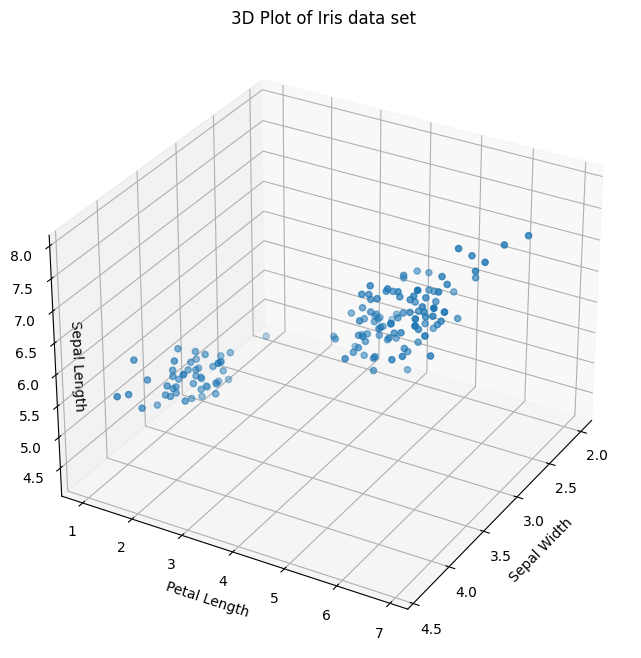

In [24]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['sepal width (cm)'], df['petal length (cm)'],df['sepal length (cm)'])

# Set labels and title
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Sepal Length', labelpad=-30)
ax.set_title('3D Plot of Iris data set')

# Rotate the plot
ax.view_init(elev=30, azim=30)  # Set the elevation and azimuthal angle

plt.show()

Next we fit a linear model with 3 explanatory variables and we use it to predict the sepal length.

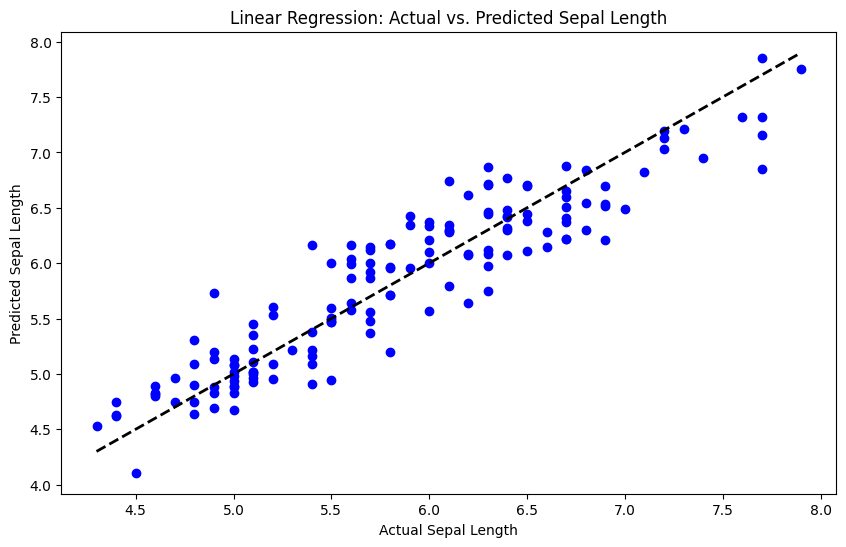

In [25]:
from sklearn.linear_model import LinearRegression

X = df[['sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['sepal length (cm)']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict sepal length
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line indicating perfect prediction
plt.xlabel('Actual Sepal Length')
plt.ylabel('Predicted Sepal Length')
plt.title('Linear Regression: Actual vs. Predicted Sepal Length')
plt.show()

## Classification

Let's consider now a different kind of problem: a **classification problem**. There are 3 species of Iris in this data set, which can be listed with `iris['target_names']`.

In [31]:
df['species'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's explore the data with pairwise scatter plots and density plots.

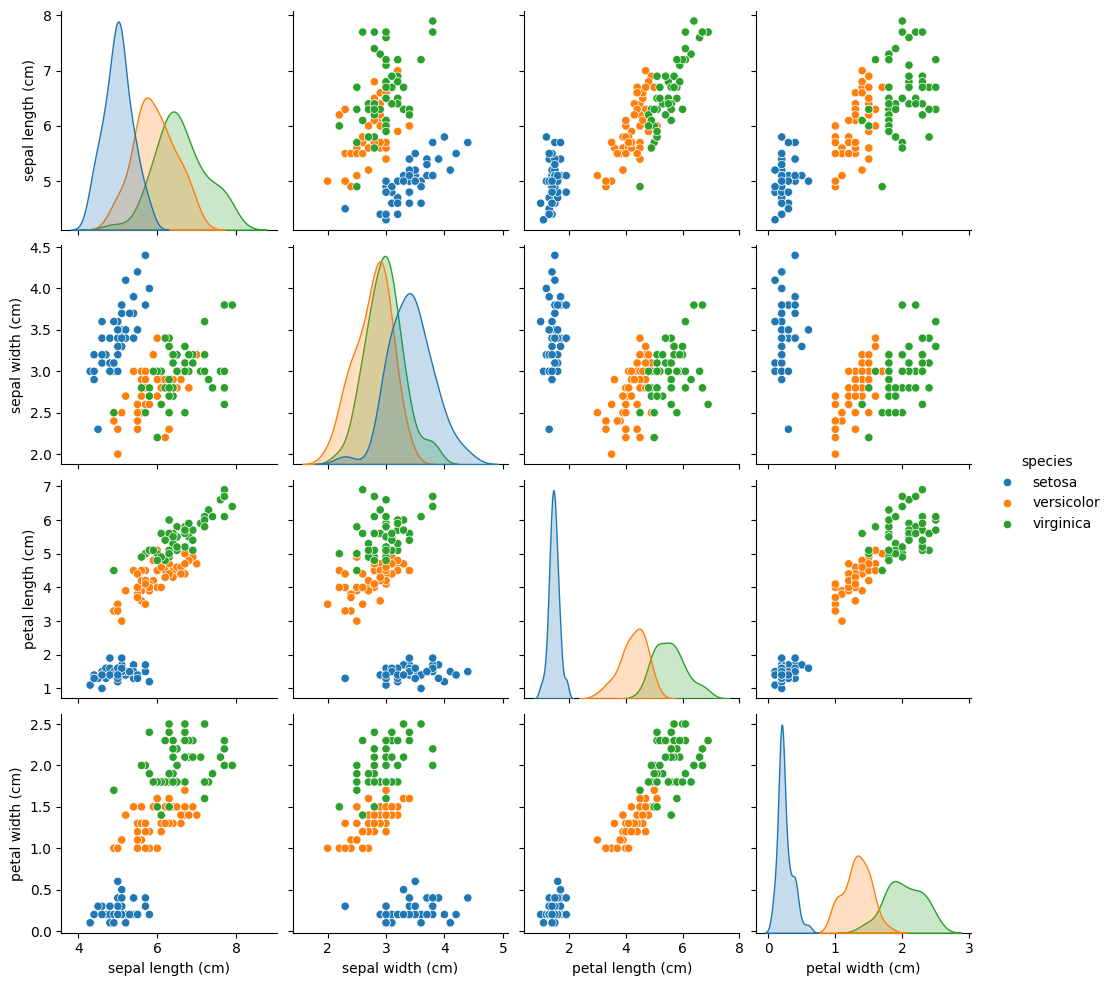

In [33]:
sns.pairplot(df, hue= 'species')

The goal is to predict the species from the attributes of each flower.

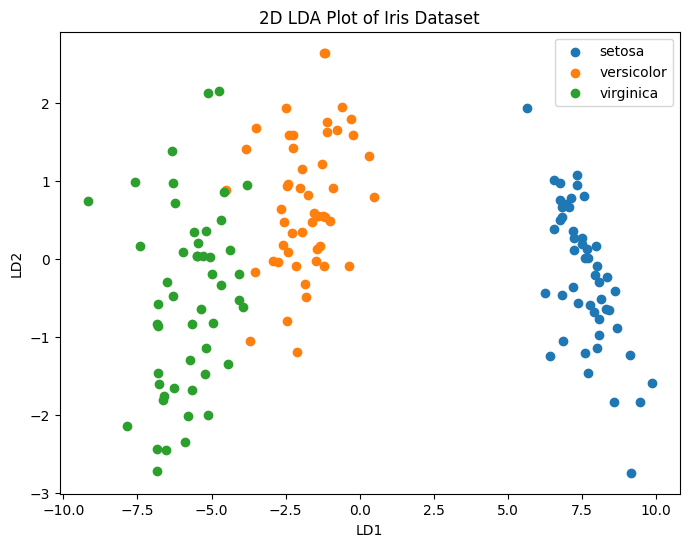

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[['sepal width (cm)','petal length (cm)','petal width (cm)','sepal length (cm)']]
y = df['species']

# Perform Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a 2D plot
plt.figure(figsize=(8, 6))

# Scatter plot for each class
for species, target_name in zip(df['species'].unique(), df['species'].unique()):
    plt.scatter(X_lda[y == species, 0], X_lda[y == species, 1], label=target_name)

# Set labels and title
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('2D LDA Plot of Iris Dataset')

# Add legend
plt.legend()

plt.show()